In [22]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression 
from matplotlib import pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from pathlib import Path
import seaborn as sns
import datetime as dt


In [23]:
df = pd.read_csv("https://raw.githubusercontent.com/byoung6/covid/lings_branch/clean_selected_covid_data2.csv")
df.head(5)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
0,2021-01-30,Algeria,Africa,250.429,33.0,0.740,3.857,30.0
1,2021-02-01,Algeria,Africa,246.286,29.0,0.650,4.000,2509.0
2,2021-02-02,Algeria,Africa,249.143,23.0,0.516,3.857,2819.0
3,2021-02-05,Algeria,Africa,248.857,21.0,0.471,3.571,3217.0
4,2021-02-08,Algeria,Africa,247.857,25.0,0.560,3.429,3748.0


# Cleaning Data

In [24]:
# looking at info on our selected columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13856 entries, 0 to 13855
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       13856 non-null  object 
 1   location                   13856 non-null  object 
 2   continent                  13856 non-null  object 
 3   new_cases_smoothed         13856 non-null  float64
 4   icu_patients               13856 non-null  float64
 5   icu_patients_per_million   13856 non-null  float64
 6   new_deaths_smoothed        13856 non-null  float64
 7   new_vaccinations_smoothed  13856 non-null  float64
dtypes: float64(5), object(3)
memory usage: 866.1+ KB


In [25]:
# checking for nulls
df.isnull().sum()

date                         0
location                     0
continent                    0
new_cases_smoothed           0
icu_patients                 0
icu_patients_per_million     0
new_deaths_smoothed          0
new_vaccinations_smoothed    0
dtype: int64

In [26]:
# dropping nulls
clean_selection = df.dropna()

In [27]:
# double checking there are no nulls after drop
clean_selection.isnull().sum()

date                         0
location                     0
continent                    0
new_cases_smoothed           0
icu_patients                 0
icu_patients_per_million     0
new_deaths_smoothed          0
new_vaccinations_smoothed    0
dtype: int64

In [28]:
#  1. Get the total vaccination rate for north america
usa_vaccination = df.groupby('location')
usa_vaccination

In [29]:
for location, location_df in usa_vaccination:
    print(location)
    print(location_df)

Algeria
           date location continent  new_cases_smoothed  icu_patients  \
0    2021-01-30  Algeria    Africa             250.429          33.0   
1    2021-02-01  Algeria    Africa             246.286          29.0   
2    2021-02-02  Algeria    Africa             249.143          23.0   
3    2021-02-05  Algeria    Africa             248.857          21.0   
4    2021-02-08  Algeria    Africa             247.857          25.0   
..          ...      ...       ...                 ...           ...   
339  2022-02-04  Algeria    Africa            1319.714          40.0   
340  2022-02-05  Algeria    Africa            1184.000          34.0   
341  2022-02-06  Algeria    Africa            1028.857          27.0   
342  2022-02-07  Algeria    Africa             908.714          34.0   
343  2022-02-08  Algeria    Africa             795.429          21.0   

     icu_patients_per_million  new_deaths_smoothed  new_vaccinations_smoothed  
0                       0.740                3.

In [30]:
usa_vaccination.get_group('United States')

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,2020-12-14,United States,North America,220854.571,25560.0,76.776,2567.429,4512.0
13428,2020-12-15,United States,North America,220666.571,25812.0,77.533,2625.143,26940.0
13429,2020-12-16,United States,North America,222976.714,25974.0,78.020,2704.000,71082.0
13430,2020-12-17,United States,North America,223667.571,25894.0,77.780,2770.286,121259.0
13431,2020-12-18,United States,North America,225101.429,25950.0,77.948,2707.571,179953.0
...,...,...,...,...,...,...,...,...
13851,2022-02-11,United States,North America,187509.143,16123.0,48.430,2338.286,429531.0
13852,2022-02-12,United States,North America,180461.429,15408.0,46.282,2324.286,414989.0
13853,2022-02-13,United States,North America,177070.714,14878.0,44.690,2331.000,405192.0
13854,2022-02-14,United States,North America,152034.429,14414.0,43.296,2309.857,369744.0


In [31]:
location_df.head(10)

,date,location,continent,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,2020-12-14,United States,North America,220854.571,25560.0,76.776,2567.429,4512.0
13428,2020-12-15,United States,North America,220666.571,25812.0,77.533,2625.143,26940.0
13429,2020-12-16,United States,North America,222976.714,25974.0,78.020,2704.000,71082.0
13430,2020-12-17,United States,North America,223667.571,25894.0,77.780,2770.286,121259.0
13431,2020-12-18,United States,North America,225101.429,25950.0,77.948,2707.571,179953.0
13432,2020-12-19,United States,North America,221721.714,25805.0,77.512,2739.143,180233.0
13433,2020-12-20,United States,North America,221947.286,26057.0,78.269,2754.857,169468.0
13434,2020-12-21,United States,North America,220358.429,26431.0,79.393,2776.000,223236.0
13435,2020-12-22,United States,North America,217537.714,26730.0,80.291,2820.429,280043.0
13436,2020-12-23,United States,North America,215497.857,26928.0,80.885,2769.857,339225.0


# Linear Regression Model

(429,)


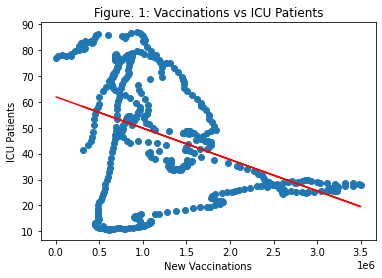

In [32]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.icu_patients_per_million
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('ICU Patients')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

(429,)


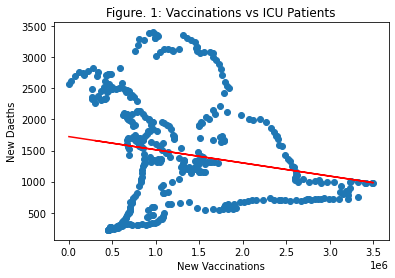

In [33]:
X = location_df.new_vaccinations_smoothed.values.reshape(-1, 1)
y = location_df.new_deaths_smoothed
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.xlabel('New Vaccinations')
plt.ylabel('New Daeths')
plt.title('Figure. 1: Vaccinations vs ICU Patients')
plt.plot(X, y_pred, color='red')
plt.show()

# Coorelation Tested

In [34]:
location_df.corr()

,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
new_cases_smoothed,1.000000,0.631018,0.631017,0.441193,-0.251193
icu_patients,0.631018,1.000000,1.000000,0.785160,-0.414290
icu_patients_per_million,0.631017,1.000000,1.000000,0.785160,-0.414290
new_deaths_smoothed,0.441193,0.785160,0.785160,1.000000,-0.191899
new_vaccinations_smoothed,-0.251193,-0.414290,-0.414290,-0.191899,1.000000


<AxesSubplot:>

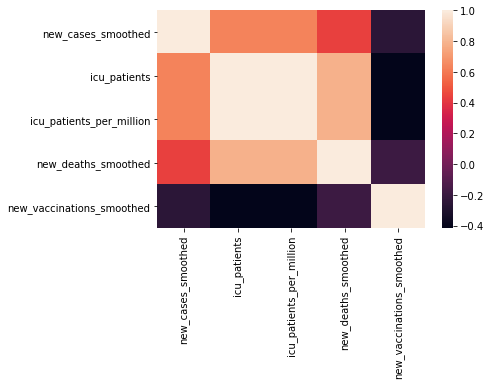

In [50]:
sns.heatmap(location_df.corr())

In [51]:
location_df = location_df.astype({'icu_patients_per_million':'int'})

In [62]:
X_1 = location_df.drop(['location','continent'],axis='columns')
X_1.tail()


,date,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13851,2022-02-11,187509.143,16123.0,48,2338.286,429531.0
13852,2022-02-12,180461.429,15408.0,46,2324.286,414989.0
13853,2022-02-13,177070.714,14878.0,44,2331.000,405192.0
13854,2022-02-14,152034.429,14414.0,43,2309.857,369744.0
13855,2022-02-15,136190.286,13785.0,41,2263.571,308624.0


# Testing Prediction With Linear Regression For Vaccinations In Future

In [53]:
# Testing Linear regression for prediction
from sklearn.model_selection import train_test_split

In [100]:
X_1['date']=pd.to_datetime(X_1['date'])
X_1['date']=X_1['date'].map(dt.datetime.toordinal)
X_1.tail()

,date,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13851,738197,187509.143,16123.0,48,2338.286,429531.0
13852,738198,180461.429,15408.0,46,2324.286,414989.0
13853,738199,177070.714,14878.0,44,2331.000,405192.0
13854,738200,152034.429,14414.0,43,2309.857,369744.0
13855,738201,136190.286,13785.0,41,2263.571,308624.0


In [101]:
X = X_1['date']
y = X_1['new_vaccinations_smoothed']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [103]:
lr = LinearRegression()

In [104]:
lr.fit(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [105]:
lr.predict(np.array([[738207]]))

array([[828733.89758372]])

# Training and Testing

In [72]:
X_2 = X_1.drop(['date'],axis='columns')
X_2

,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed
13427,220854.571,25560.0,76,2567.429,4512.0
13428,220666.571,25812.0,77,2625.143,26940.0
13429,222976.714,25974.0,78,2704.000,71082.0
13430,223667.571,25894.0,77,2770.286,121259.0
13431,225101.429,25950.0,77,2707.571,179953.0
...,...,...,...,...,...
13851,187509.143,16123.0,48,2338.286,429531.0
13852,180461.429,15408.0,46,2324.286,414989.0
13853,177070.714,14878.0,44,2331.000,405192.0
13854,152034.429,14414.0,43,2309.857,369744.0


In [73]:
X = pd.get_dummies(X_2, columns=["new_vaccinations_smoothed"])
X

,new_cases_smoothed,icu_patients,icu_patients_per_million,new_deaths_smoothed,new_vaccinations_smoothed_4512.0,new_vaccinations_smoothed_26940.0,new_vaccinations_smoothed_71082.0,new_vaccinations_smoothed_121259.0,new_vaccinations_smoothed_169468.0,new_vaccinations_smoothed_179953.0,...,new_vaccinations_smoothed_3211266.0,new_vaccinations_smoothed_3230427.0,new_vaccinations_smoothed_3231638.0,new_vaccinations_smoothed_3237565.0,new_vaccinations_smoothed_3318805.0,new_vaccinations_smoothed_3324816.0,new_vaccinations_smoothed_3407833.0,new_vaccinations_smoothed_3414078.0,new_vaccinations_smoothed_3485734.0,new_vaccinations_smoothed_3498649.0
13427,220854.571,25560.0,76,2567.429,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13428,220666.571,25812.0,77,2625.143,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13429,222976.714,25974.0,78,2704.000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13430,223667.571,25894.0,77,2770.286,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13431,225101.429,25950.0,77,2707.571,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13851,187509.143,16123.0,48,2338.286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13852,180461.429,15408.0,46,2324.286,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13853,177070.714,14878.0,44,2331.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13854,152034.429,14414.0,43,2309.857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# assign target variable to y
y = X_2.icu_patients_per_million

In [75]:
X.shape

(429, 433)

In [76]:
y.shape

(429,)

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape

(343, 433)

In [78]:
len(X_train)

343

In [79]:
len(X_test)

86

In [80]:
len(y_test)

86

# Testing Through Balanced Random Forest

In [81]:
#Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)

In [82]:
model.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [83]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)

In [84]:
balanced_accuracy_score(y_test, y_pred)

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.407608695652174

# Testing Through SVM

In [86]:
#Resample with SVM
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [87]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [88]:
y_pred = model.predict(X_test)
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,75,75
1,10,10
2,86,86
3,48,48
4,51,51


In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6046511627906976

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.50      1.00      0.67         1
          16       0.50      0.50      0.50         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       1.00      1.00      1.00         2
          24       0.50      0.50      0.50         2
          25       0.75      0.75      0.75         4
          26       0.67      1.00      0.80         2
          27       1.00      0.75      0.86         4
          28       0.75      1.00      0.86         3
          29       0.00      0.00      0.00         1
          33       1.00    

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mal

# Testing EasyEnsembleClassifier

In [92]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
model = EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [93]:
model.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [94]:
y_pred = model.predict(X_test)

In [95]:
# Calculated the balanced accuracy score
balanced_accuracy_score(y_test, y_pred)

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.06884057971014493

In [96]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [97]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.25      1.00      0.40         2
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          25       0.00      0.00      0.00         4
          26       0.00      0.00      0.00         2
          27       0.29      1.00      0.44         4
          28       0.00      0.00      0.00         3
          29       0.00      0.00      0.00         1
          33       0.00    

C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mal

In [98]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Testing Logistic Regression Model

In [99]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.070


C:\Users\mali_\anaconda3\envs\PythonData2\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
